In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [2]:
# Surpress globally the use of exponential numbers
pd.options.display.float_format = '{:.4f}'.format

# #feature_importance.round(3) or do it manually with this code

In [3]:
dataset_path_USA = os.path.join('../../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path_USA + file_name_USA)

X = df.drop(['price'], axis = 1)
y = df['price']

13 features, reduction of 0.00%


Text(0.5, 1.0, 'Elastic Net - Feature Weights for USA Housing Dataset')

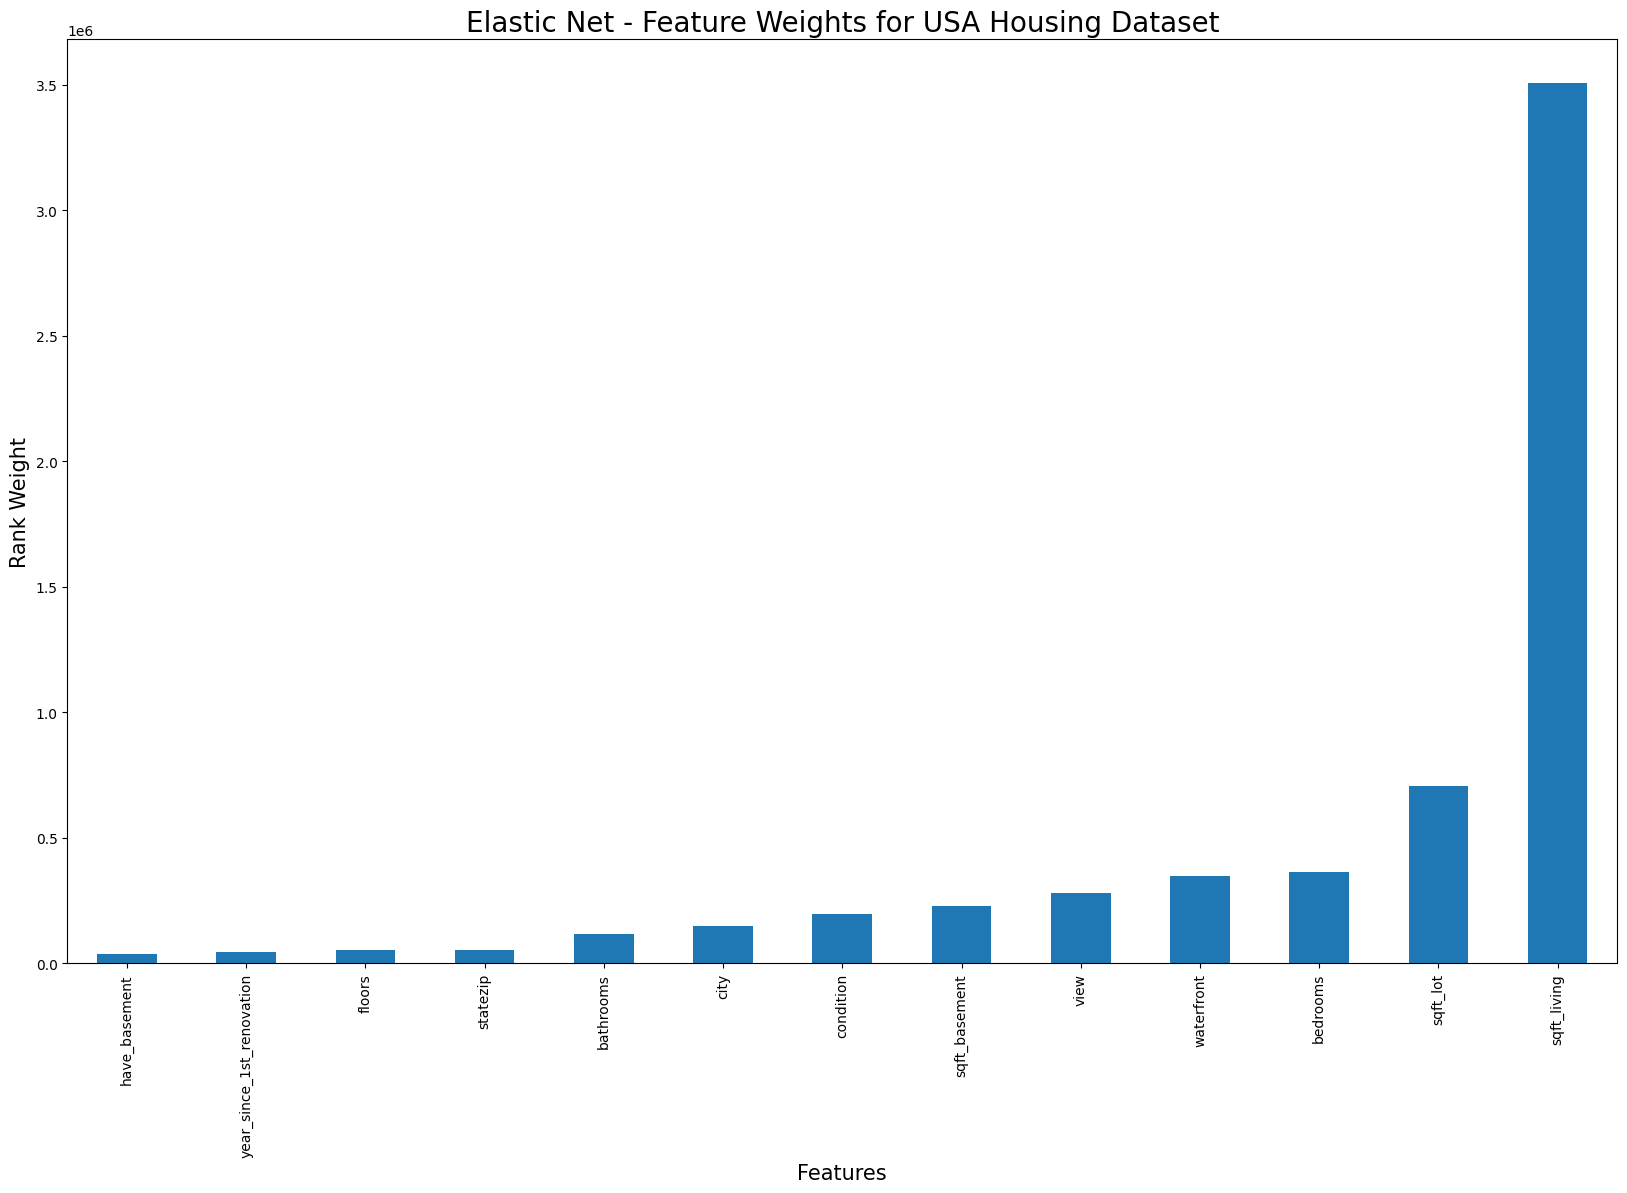

In [4]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X, y)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X, y)

feature_importance_USA = pd.Series(index = X.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_USA>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_USA))*100))

feature_importance_USA.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Elastic Net - Feature Weights for USA Housing Dataset', fontsize = 20)

Text(0.5, 1.0, 'Elastic Net - Feature Weights for USA Housing Dataset')

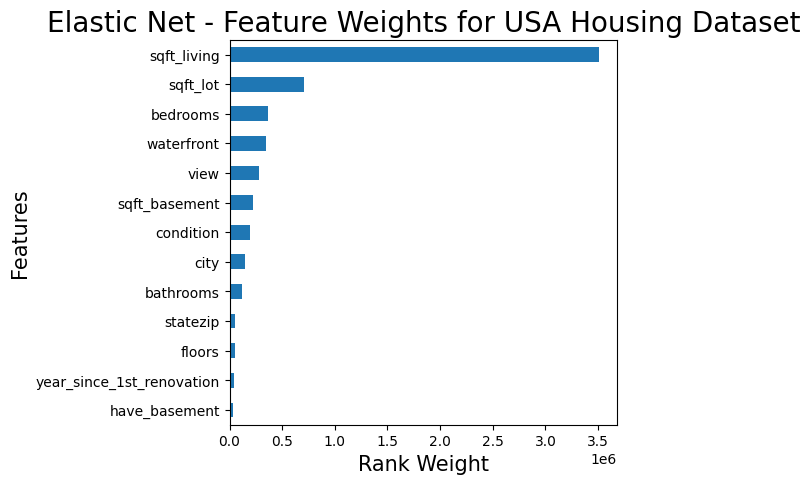

In [5]:
feature_importance_USA.sort_values().tail(30).plot(kind = 'barh', figsize = (5,5))
plt.ylabel('Features', fontsize = 15)
plt.xlabel('Rank Weight', fontsize = 15)
plt.title('Elastic Net - Feature Weights for USA Housing Dataset', fontsize = 20)

In [6]:
elastic_net_USA = feature_importance_USA.to_frame()
elastic_net_USA['method'] = 'elastic_net'
elastic_net_USA['dataset'] = 'USA_houseprices_2014'


elastic_net_USA = elastic_net_USA.reset_index(level = 0)
elastic_net_USA.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_USA['feature_rank'] = elastic_net_USA['feature_rank'].rank(method='first', ascending=False)
elastic_net_USA

,feature_name,feature_rank,method,dataset
0,bedrooms,3.0000,elastic_net,USA_houseprices_2014
1,bathrooms,9.0000,elastic_net,USA_houseprices_2014
2,sqft_living,1.0000,elastic_net,USA_houseprices_2014
3,sqft_lot,2.0000,elastic_net,USA_houseprices_2014
4,floors,11.0000,elastic_net,USA_houseprices_2014
5,waterfront,4.0000,elastic_net,USA_houseprices_2014
6,view,5.0000,elastic_net,USA_houseprices_2014
7,condition,7.0000,elastic_net,USA_houseprices_2014
8,sqft_basement,6.0000,elastic_net,USA_houseprices_2014
9,year_since_1st_renovation,12.0000,elastic_net,USA_houseprices_2014


In [7]:
#elastic_net_USA.to_csv('../../data/cross_validation_USA/el_ranks.csv', sep=';',index=False)

In [ ]:
dataset_path_USA = os.path.join('../../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path_USA + file_name_USA)

featureranks_basepath = os.path.join(project_path, 'data')
all_ranks_cv = pd.DataFrame()

# Put all ranks into one csv
for file in os.listdir(featureranks_basepath):
    if file.endswith('.csv') and file != 'featureranks_ALLMETHODS.csv':
        df = pd.read_csv(os.path.join(featureranks_basepath, file), sep=";")
        all_ranks_cv = pd.concat([all_ranks_cv, df], axis=0)

# Save all ranks together
all_ranks_cv.to_csv(os.path.join(project_path, 'data', 'featureranks_ALLMETHODS.csv'), sep=";", index=False)
all_ranks_cv = all_ranks_cv.query('method != "Lasso_regression"') # temporarily take out these methods


In [ ]:
all_ranks_cv.query('method != "CART" and method != "Lasso_regression"').groupby(['method', 'dataset'])['feature_name'].count()

In [ ]:
all_ranks_cv.query('dataset == "USA_houseprices_2014"').pivot( index=['dataset', 'feature_name'], columns=['method'], 
        values=['feature_rank']).reset_index()